<a href="https://colab.research.google.com/github/ShrutiThorat/PlantDiseaseDetection/blob/main/PlantDiseaseDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Import Libraries**

In [3]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

**Load Data into Train and Test Variables.** 

In [4]:
# My data is in google drive.
train_dir ='/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN'
test_dir='/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST'

In [5]:
!ls /content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST

Pepper_bell_Bacterial_spot  Tomato_Late_blight
Pepper_bell_healthy	    Tomato_Leaf_Mold
Potato_Early_blight	    Tomato_mosaic_virus
Potato_healthy		    Tomato_Septoria_leaf_spot
Potato_Late_blight	    Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Bacterial_spot	    Tomato_Target_Spot
Tomato_Early_blight	    Tomato_YellowLeaf_Curl_Virus
Tomato_healthy


**Visualization**

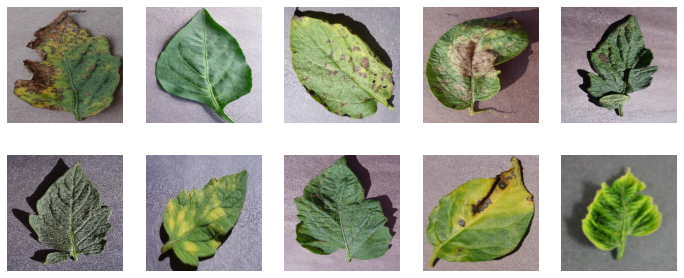

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8d56489d-58dc-43d8-a399-906b18b78566___GCREC_Bact.Sp 3081.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Pepper_bell_healthy/8b0c55d7-2d4b-447f-a788-05f18b781b86___JR_HL 8064.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Potato_Early_blight/8e05b766-d0a9-4621-9bb4-d16bef411dda___RS_Early.B 7238.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Potato_Late_blight/09a215a1-a539-4635-a27f-232229ff11f4___RS_LB 4529.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Early_blight/9b84e7ac-4ffd-4e0b-8099-86f30ad23cda___RS_Erly.B 7731.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_healthy/7e37d8c3-2f62-4a95-b430-34746cb25776___RS_HL 0188.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Leaf_Mold/20e63ca2-e070-422c-9839-9cac224719e5___Crnl_L.Mold 8650.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Target_Spot/8f675e4c-4511-47dd-9a01-41a8fe736dd4___Com.G_TgS_FL 8079.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Pepper_bell_Bacterial_spot/9abd1ec5-33f5-418d-8527-c894dd7739d7___JR_B.Spot 9064.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_YellowLeaf_Curl_Virus/4ecba79a-86e4-4948-9597-974285be499a___UF.GRC_YLCV_Lab 01608.JPG")
plt.imshow(img)

**Function To count Images In Each DataSet**

In [6]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [7]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
16520 Train images
4128 Test images


In [8]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
# set height and width and color of input image.
width,height =256,256
input_shape=(width,height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)

Found 16520 images belonging to 15 classes.
Found 4128 images belonging to 15 classes.


In [10]:
train_generator.class_indices

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato_Target_Spot': 11,
 'Tomato_YellowLeaf_Curl_Virus': 12,
 'Tomato_healthy': 13,
 'Tomato_mosaic_virus': 14}

**CNN Parameter Building**

In [11]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

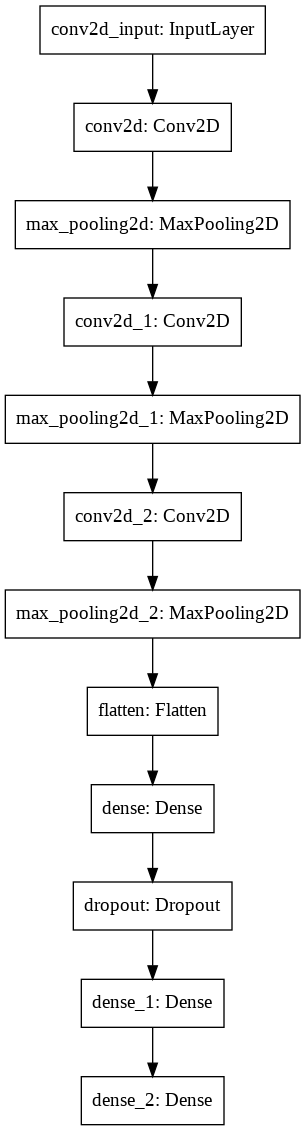

In [12]:
keras.utils.plot_model(model, "my_cnn_model.png")

In [13]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


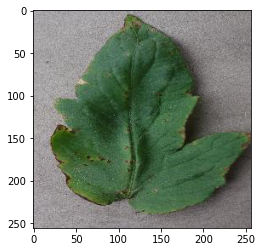

In [15]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8bd2f1ec-3094-479f-9210-f7fba270922d___GCREC_Bact.Sp 6256.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8bd2f1ec-3094-479f-9210-f7fba270922d___GCREC_Bact.Sp 6256.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [16]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
#max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
#flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
#conv2d_3_features = conv2d_3_output.predict(img)
#max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
#flatten_1_features = flatten_1_output.predict(img)

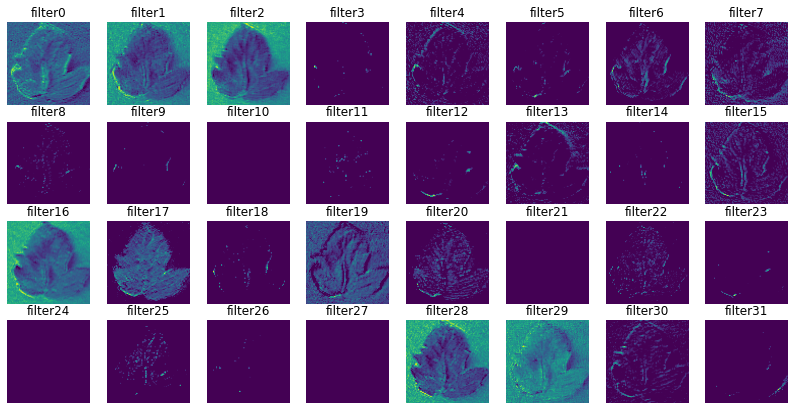

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

In [18]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(height, width),
    batch_size=batch_size) 

Found 16520 images belonging to 15 classes.


In [19]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=10,
                          #steps_per_epoch=100,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                        verbose=1)

Epoch 1/10
516/516 [==============================] - 4106s 8s/step - loss: 1.7817 - accuracy: 0.4277 - val_loss: 0.7737 - val_accuracy: 0.7342
Epoch 2/10
516/516 [==============================] - 452s 877ms/step - loss: 0.7368 - accuracy: 0.7526 - val_loss: 0.4852 - val_accuracy: 0.8344
Epoch 3/10
516/516 [==============================] - 451s 875ms/step - loss: 0.5031 - accuracy: 0.8327 - val_loss: 0.2747 - val_accuracy: 0.9120
Epoch 4/10
516/516 [==============================] - 450s 874ms/step - loss: 0.3901 - accuracy: 0.8666 - val_loss: 0.3543 - val_accuracy: 0.8840
Epoch 5/10
516/516 [==============================] - 452s 876ms/step - loss: 0.3382 - accuracy: 0.8852 - val_loss: 0.1879 - val_accuracy: 0.9370
Epoch 6/10
516/516 [==============================] - 456s 885ms/step - loss: 0.2793 - accuracy: 0.9053 - val_loss: 0.1612 - val_accuracy: 0.9481
Epoch 7/10
516/516 [==============================] - 455s 883ms/step - loss: 0.2611 - accuracy: 0.9117 - val_loss: 0.1537 - v

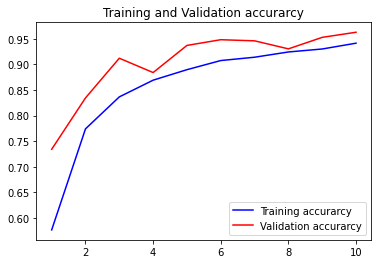

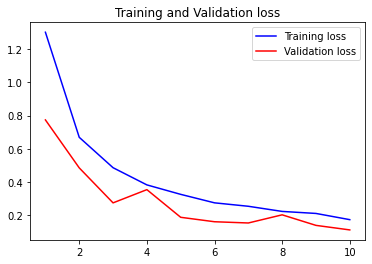

In [27]:
from keras.callbacks import History 
#history = History()

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [28]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

129/129 [==============================] - 710s 6s/step - loss: 0.1984 - accuracy: 0.9348
Test score is 0.1983688622713089
Test accuracy is 0.9348352551460266


In [29]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [30]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [31]:
classes = train_generator.class_indices 
classes

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato_Target_Spot': 11,
 'Tomato_YellowLeaf_Curl_Virus': 12,
 'Tomato_healthy': 13,
 'Tomato_mosaic_virus': 14}

In [32]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Pepper_bell_Bacterial_spot","Pepper_bell_healthy","Potato_Early_blight","Potato_Late_blight","Potato_healthy","Tomato_Bacterial_spot",
           "Tomato_Early_blight","Tomato_Late_blight","Tomato_Leaf_Mold","Tomato_Septoria_leaf_spot","Tomato_Spider_mites_Two-spotted_spider_mite",
           "Tomato_Target_Spot","Tomato_YellowLeaf_Curl_Virus","Tomato_healthy","Tomato_mosaic_virus"]


Tomato_Early_blight


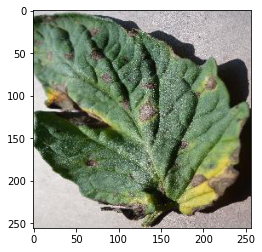

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Potato_Late_blight


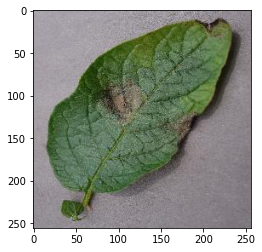

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Pepper_bell_Bacterial_spot


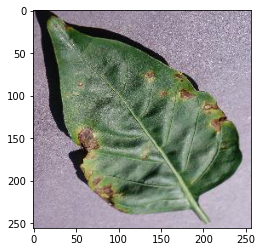

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Pepper_bell_Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Pepper_bell_Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG')
plt.imshow(disease)
print (Classes[int(result)])